<a href="https://colab.research.google.com/github/jose-luis-hernandez-amaya/EDP-1-Ejercicios/blob/main/Ecuacion_de_onda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

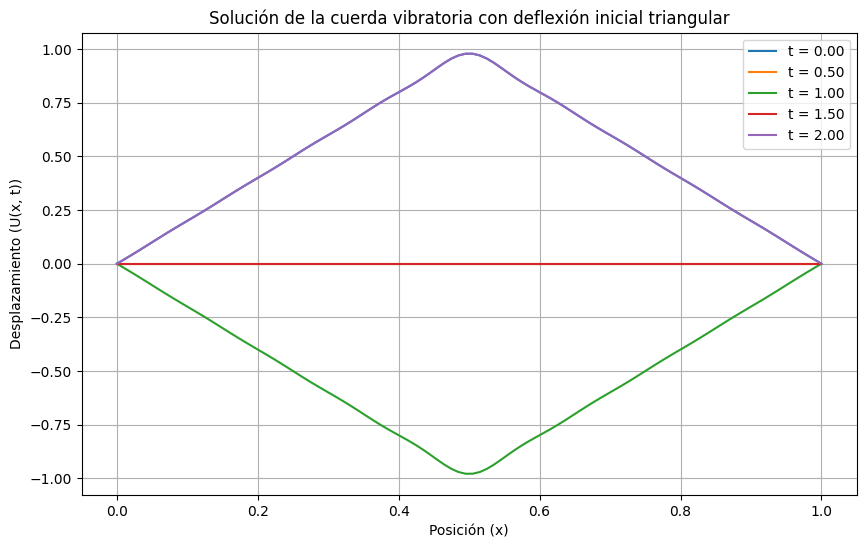

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

L = 1
K = 1
C = 1

def f(x):
    if 0 <= x <= L / 2:
        return (2 * K / L) * x
    elif L / 2 < x <= L:
        return (2 * K / L) * (L - x)       #Funcion
    else:
        return 0

def phi_n(x, n):
    return np.sin(n * np.pi * x / L)   # Expresión analítica de las funciones propias

def a_n(n):
    integral, _ = quad(lambda x: f(x) * phi_n(x, n), 0, L)
    return (2 / L) * integral

def U(x, t, N_terms=10):
    result = 0
    for n in range(1, N_terms + 1):
        omega_n = n * np.pi * C / L                          #Solucion
        result += a_n(n) * phi_n(x, n) * np.cos(omega_n * t)
    return result

x_values = np.linspace(0, L, 100)
t_values = np.linspace(0, 2, 5)

plt.figure(figsize=(10, 6))

for t in t_values:
    U_values = [U(x, t, N_terms=20) for x in x_values]
    plt.plot(x_values, U_values, label=f't = {t:.2f}')

plt.title('Solución de la cuerda vibratoria con deflexión inicial triangular')
plt.xlabel('Posición (x)')
plt.ylabel('Desplazamiento (U(x, t))')
plt.legend()
plt.grid()
plt.show()